In [1]:
using JLD2,Plots

In [2]:
;ls

cohvertex_ampls.jl
equivertex_0.0-to-100.0.jld2
equivertex_100.5-to-150.0.jld2
plots.ipynb


In [283]:
@load "equivertex_0.0-to-100.0.jld2" eqdataF eqdataC

2-element Vector{Symbol}:
 :eqdataF
 :eqdataC

In [285]:
eqdataF[71]

4-element Vector{ComplexF64}:
                    35.0 + 0.0im
 -1.7121935687690166e-13 - 2.9656062535009405e-13im
             3.064424208 + 0.0im
           2.605149848e9 + 0.0im

In [194]:
sp1, vals1,ftime1,fmem1 = [(getindex.(eqdataF,i)) for i in 1:4];
ctime1,cmem1 = [(getindex.(eqdataC,i)) for i in 3:4];

In [195]:
eqdataF2, eqdataC2 = @load "equivertex_100.5-to-150.0.jld2" eqdataF eqdataC

2-element Vector{Symbol}:
 :eqdataF
 :eqdataC

In [196]:
sp2, vals2,ftime2,fmem2 = [(getindex.(eqdataF,i)) for i in 1:4];
ctime2,cmem2 = [(getindex.(eqdataC,i)) for i in 3:4];

In [197]:
spins  = real(vcat(sp1,sp2)); 
vals  = vcat(vals1,vals2); 
ftime  = real(vcat(ftime1,ftime2)); 
fmem  = real(vcat(fmem1,fmem2)); 

ctime  = real(vcat(ctime1,ctime2)); 
cmem  = real(vcat(cmem1,cmem2)); 

In [282]:
ftime[71]

3.064424208

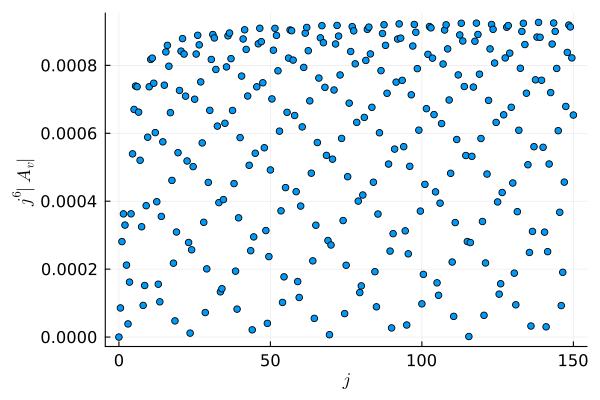

In [355]:
plot( thickness_scaling = 1.1,xtickfontsize = 10,ytickfontsize = 10)

plt = scatter!(spins, abs.(spins.^6 .* vals), ms=:3.3,leg=false,c=:1,xlabel="\$j\$",ylabel="\$j^6 |{A}_v|\$")


#savefig(plt,"equiAv.pdf") 

In [234]:
ramp=[exp(-im*angle(vals[3])*k)*vals[Int(2k+1)] for k in spins];

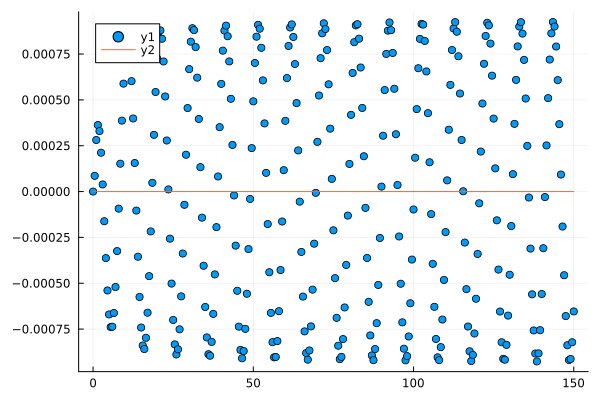

In [236]:
scatter(spins, real(spins.^6 .* ramp),m=:c)
plot!(spins, imag(spins.^6 .* ramp))

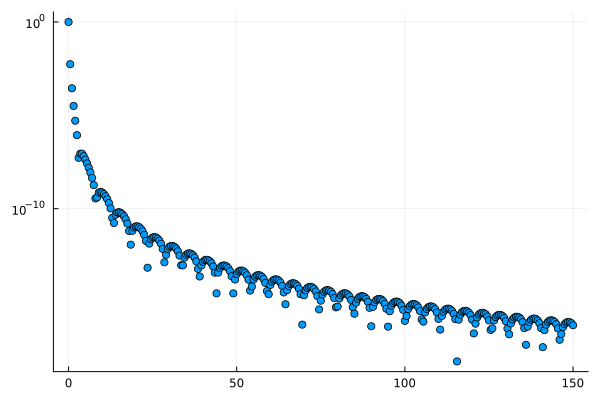

In [231]:
scatter(spins, abs.(vals),leg=false,yaxis=:log10)

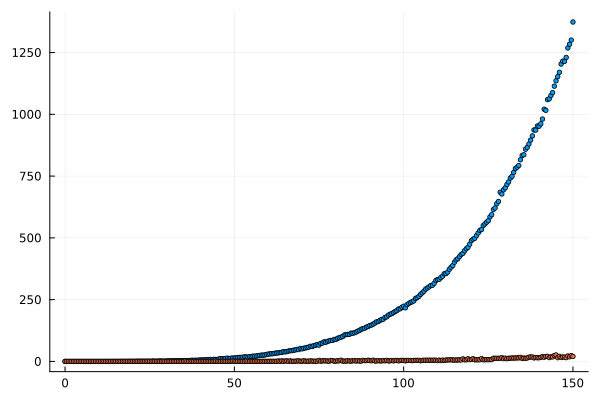

In [287]:
scatter(spins, ftime,leg=false , ms=:2.5)
scatter!(spins, ctime,leg=false , ms=:2.5)

In [290]:
(ftime[end])

1373.623457125

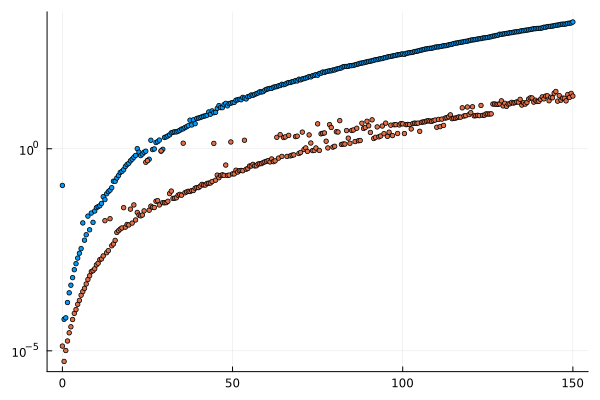

In [286]:
scatter(spins, ftime,leg=false , ms=:2.5,yaxis=:log10)
scatter!(spins, ctime,leg=false , ms=:2.5,yaxis=:log10)
# scatter!(spins, 2.2e-7*(2spins .+1).^4 ,leg=false , ms=:2.5,yaxis=:log10)
# scatter!(spins, 4e-9*(2spins .+1).^4 ,leg=false , ms=:2.5,yaxis=:log10)

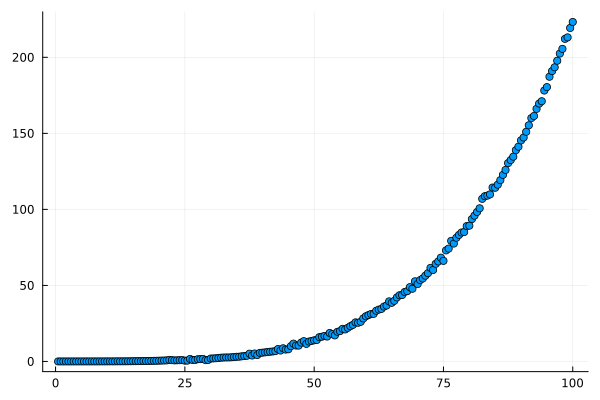

In [90]:
scatter(spins[2:end], abs.(ftime)[2:end],leg=false)#,yaxis=:log10)
#scatter!(spins[2:end], 100abs.(ctime)[2:end],leg=false)#,yaxis=:log10)

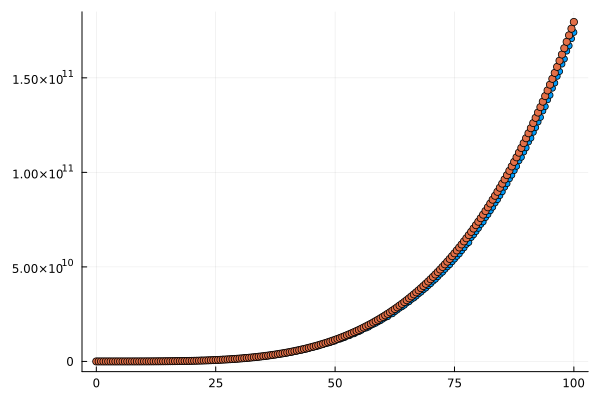

In [99]:
scatter(spins, abs.(fmem),leg=false,ms=:3.4)#,yaxis=:log10)
#scatter!(spins, 0.55abs.((2*spins .+1).^5),leg=false)#,yaxis=:log10)
scatter!(spins, 110abs.((2*spins .+1).^4),leg=false)#,yaxis=:log10)

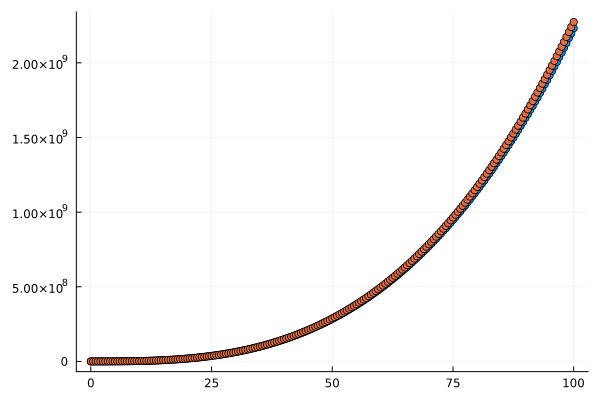

In [81]:
scatter(spins, abs.(cmem),leg=false)#,yaxis=:log10)
scatter!(spins, 280abs.((2*spins .+1).^3),leg=false)#,yaxis=:log10)